<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [50]:
import pandas as pd

Load the dataset into a dataframe.


In [51]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


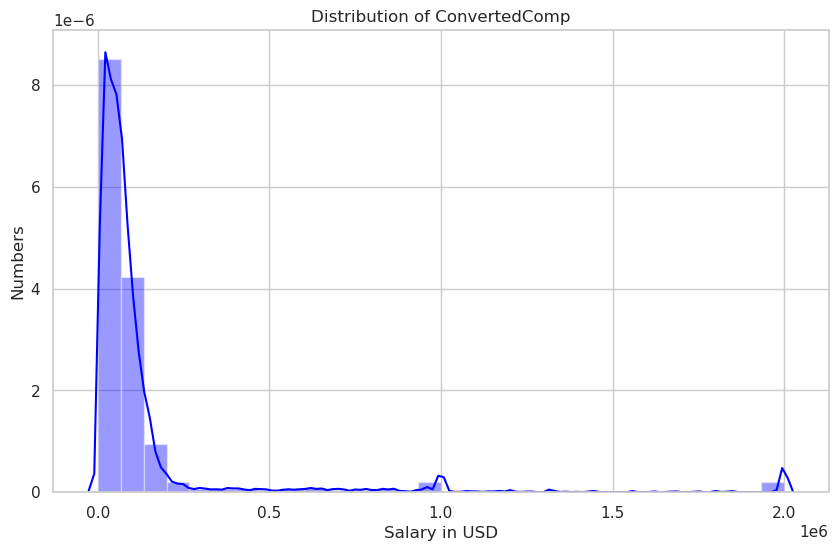

In [52]:
# your code goes here
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.distplot(df['ConvertedComp'], kde=True, color='blue', bins=30)
plt.title('Distribution of ConvertedComp')
plt.xlabel('Salary in USD')
plt.ylabel('Numbers')
plt.grid(True)
plt.show()

Plot the histogram for the column `ConvertedComp`.


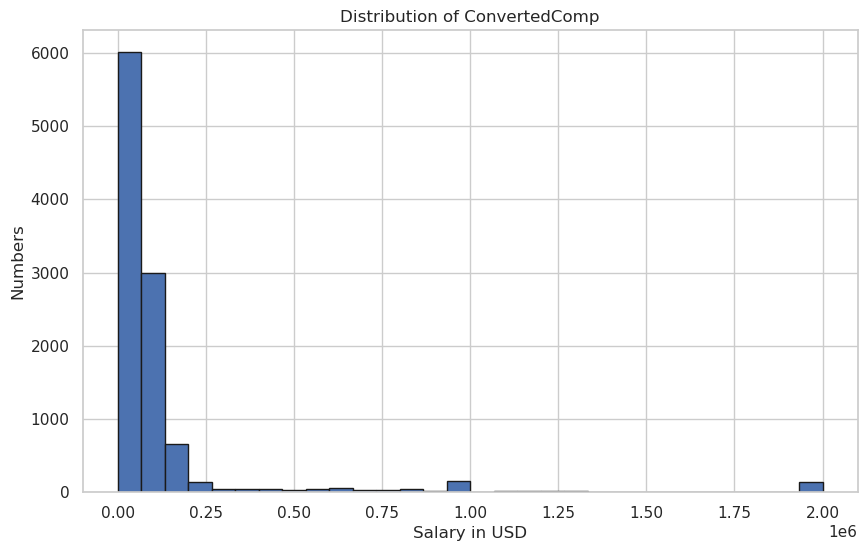

In [53]:
# your code goes here
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=30, edgecolor='k')
plt.title('Distribution of ConvertedComp')
plt.xlabel('Salary in USD')
plt.ylabel('Numbers')
plt.grid(True)
plt.show()

What is the median of the column `ConvertedComp`?


In [54]:
# your code goes here
print("ConvertedComp Median:", df['ConvertedComp'].median())

ConvertedComp Median: 57745.0


How many responders identified themselves only as a **Man**?


In [55]:
# your code goes here
df_man = df[df['Gender'] == 'Man']

num_man_responders = len(df_man)
print("Number of responders who identified themselves as 'Man' only:", num_man_responders)

Number of responders who identified themselves as 'Man' only: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [56]:
# your code goes here
df_woman=df[df['Gender']=='Woman']
print("Woman Median:", df_woman['ConvertedComp'].median())

Woman Median: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [57]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


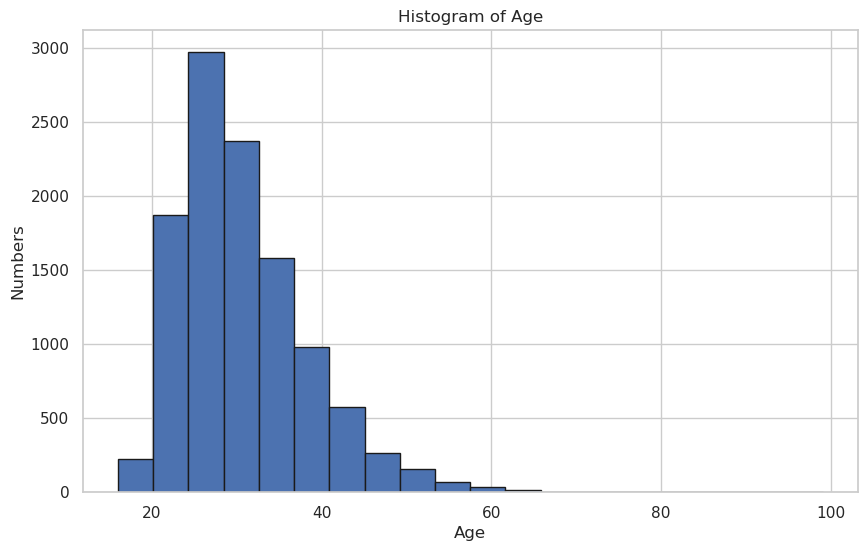

In [58]:
# your code goes here
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, edgecolor='k')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Numbers')
plt.grid(True)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


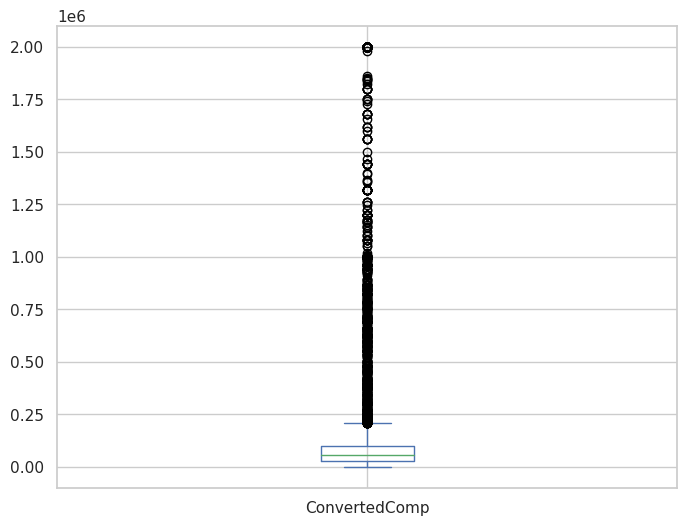

In [59]:
# your code goes here
df_cv = pd.DataFrame(data=df['ConvertedComp'])
df_cv.plot(kind='box', figsize=(8,6))
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [68]:
# your code goes here
df['ConvertedComp'].dropna(axis=0,inplace=True) 
Q1,Q3=df['ConvertedComp'].quantile(.25),df['ConvertedComp'].quantile(.75)
IQR=Q3 - Q1
print('The Inter Quartile Range for ConvertedComp:', IQR)

The Inter Quartile Range for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [69]:
# your code goes here
upper=Q3+(IQR*1.5)
lower=Q1-(IQR*1.5)

print('Upper Bound:', upper)
print('Lower Bound:', lower)

Upper Bound: 209698.0
Lower Bound: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [70]:
# your code goes here
(df['ConvertedComp']<lower) | (df['ConvertedComp']>upper)

0        False
1        False
2        False
3         True
4        False
         ...  
11393    False
11394    False
11395    False
11396    False
11397    False
Name: ConvertedComp, Length: 11398, dtype: bool

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [72]:
# your code goes here
column_of_interest = 'ConvertedComp'

# Calculate the quartiles (Q1 and Q3) and IQR for the column
Q1 = df[column_of_interest].quantile(0.25)
Q3 = df[column_of_interest].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame by removing outliers
df_no_outliers = df[(df[column_of_interest] >= lower_bound) & (df[column_of_interest] <= upper_bound)]

# Display the summary statistics of the new DataFrame
print(df_no_outliers[column_of_interest].describe())

count      9703.000000
mean      59883.208389
std       43394.336755
min           0.000000
25%       24060.000000
50%       52704.000000
75%       85574.500000
max      209356.000000
Name: ConvertedComp, dtype: float64


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [41]:
# your code goes here
correlation_matrix = df.corr()

# Extract the correlation values for 'Age' with all other numerical columns
correlation_with_age = correlation_matrix['Age']
print(correlation_with_age)

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
